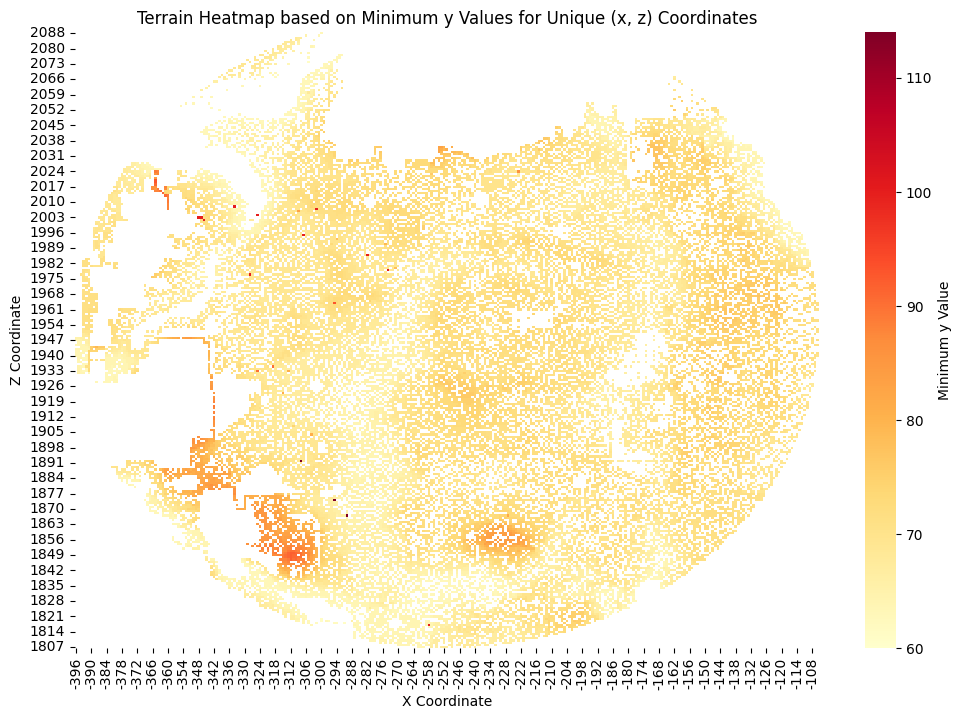

In [11]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 定义文件夹路径
folder_path = 'd:/projects/Gaming/data/4E/terrain'

# 初始化空列表存储所有 log 文件内容
log_data = []

# 遍历文件夹中的所有文件
for file_name in os.listdir(folder_path):
    # 检查文件是否以 .log 结尾
    if file_name.endswith('.log'):
        # 构造文件完整路径
        file_path = os.path.join(folder_path, file_name)
        # 读取文件内容并添加到 log_data 列表中
        with open(file_path, 'r') as file:
            log_data.extend(file.readlines())

# 现在 log_data 包含了所有 log 文件的内容

# 提取每行中的 x, y, z 坐标，并将 y 和 z 互换
coordinates = []
pattern = r"CurrentLocation\(x,y,z\): (-?\d+) (-?\d+) (-?\d+)"

for line in log_data:
    match = re.search(pattern, line)
    if match:
        x, y, z = map(int, match.groups())
        coordinates.append((x, z, y))  # 将 y 和 z 互换

# 创建 DataFrame 并保留每个 (x, z) 对的最小 y 值
df = pd.DataFrame(coordinates, columns=['x', 'z', 'y'])
df_min_y = df.groupby(['x', 'z'], as_index=False)['y'].min()

# 透视数据以绘制热力图
heatmap_data = df_min_y.pivot(index='z', columns='x', values='y')

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Minimum y Value'})
plt.title("Terrain Heatmap based on Minimum y Values for Unique (x, z) Coordinates")
plt.xlabel("X Coordinate")
plt.ylabel("Z Coordinate")
plt.gca().invert_yaxis()  # 使 y 轴与传统的地图视角一致
plt.savefig('E4.jpg')
plt.show()

In [12]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 定义文件夹路径
log_folder_path = 'd:/projects/Gaming/data/4E/terrain'
root_dir = 'd:/projects/Gaming/data/4E'

# Step 1: 读取 log 文件数据
log_data = []
for file_name in os.listdir(log_folder_path):
    if file_name.endswith('.log'):
        file_path = os.path.join(log_folder_path, file_name)
        with open(file_path, 'r') as file:
            log_data.extend(file.readlines())

# 提取 log 文件中的坐标 (x, y, z)，并交换 y 和 z 的位置
coordinates = []
pattern = r"CurrentLocation\(x,y,z\): (-?\d+) (-?\d+) (-?\d+)"
for line in log_data:
    match = re.search(pattern, line)
    if match:
        x, y, z = map(int, match.groups())
        coordinates.append((x, z, y))  # 交换 y 和 z 的位置

# 创建 log 数据的 DataFrame
df_log = pd.DataFrame(coordinates, columns=['x', 'z', 'y'])

# Step 2: 读取 training1.csv 和 training2.csv 文件中的数据
training_data = []
for folder_name, subfolders, filenames in os.walk(root_dir):
    if 'training1.csv' in filenames and 'training2.csv' in filenames:
        # 读取 training1.csv 和 training2.csv
        file_path1 = os.path.join(folder_name, 'training1.csv')
        df1 = pd.read_csv(file_path1, header=None, usecols=[0, 2, 1], names=['x', 'y', 'z'])
        
        file_path2 = os.path.join(folder_name, 'training2.csv')
        df2 = pd.read_csv(file_path2, header=None, usecols=[0, 2, 1], names=['x', 'y', 'z'])

        file_path3 = os.path.join(folder_name, 'test1.csv')
        df3 = pd.read_csv(file_path3, header=None, usecols=[0, 2, 1], names=['x', 'y', 'z'])
        
        # 添加到 training_data 列表
        training_data.append(df1)
        training_data.append(df2)
        training_data.append(df3)

# 将所有 training 数据合并为一个 DataFrame
df_training = pd.concat(training_data, ignore_index=True)

# Step 3: 合并 log 数据和 training 数据
df_combined = pd.concat([df_log, df_training], ignore_index=True)



# Step 5: 计算每个 (x, z) 坐标的最小 y 值
df_min_y = df_combined.groupby(['x', 'z'], as_index=False)['y'].min()

df_min_y = df_min_y[df_min_y['y'] <= 80]  # 只保留 y 值小于等于 100 的点

# Step 6: 准备热力图数据
heatmap_data = df_min_y.pivot(index='z', columns='x', values='y')

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Minimum y Value'})
plt.title("Terrain Heatmap with Data from Log and Training Files")
plt.xlabel("X Coordinate")
plt.ylabel("Z Coordinate")
plt.gca().invert_yaxis()  # Invert y-axis for traditional map view
plt.savefig('E2_combined.jpg')
plt.show()

In [13]:
# 保存 df_min_y 到 CSV 文件
df_min_y.to_csv('df_min_y_filtered.csv', index=False)


In [14]:
import matplotlib.pyplot as plt
import numpy as np

terrain_data = pd.read_csv('d:/projects/Gaming/data/4E/terrain/df_min_y_filtered.csv')
# Step 6: 准备热力图数据
heatmap_data = terrain_data.pivot(index='z', columns='x', values='y')

In [15]:
import os
import pandas as pd

# 定义根目录
root_dir = 'd:/projects/Gaming/data/4E'

# 创建一个字典来存储所有的 DataFrame
dataframes1 = {}
dataframes2 = {}

# 遍历根目录下的所有子文件夹
for folder_name, subfolders, filenames in os.walk(root_dir):
    if 'training2.csv' in filenames:
    # 构建文件的完整路径
        file_path1 = os.path.join(folder_name, 'training1.csv')
        df1 = pd.read_csv(file_path1, header=None)

        file_path2 = os.path.join(folder_name, 'training2.csv')
        df2 = pd.read_csv(file_path2, header=None)

        expected_first_row = [-251, 71, 1948, 1]
        if not df1.iloc[0].tolist() == expected_first_row:
         # 如果第一行不符合预期，则替换第一行并删除原第一行
            df1.iloc[0] = expected_first_row
            df1 = df1.drop(1).reset_index(drop=True)

        if not df2.iloc[0].tolist() == expected_first_row:
         # 如果第一行不符合预期，则替换第一行并删除原第一行
            df2.iloc[0] = expected_first_row
            df2 = df2.drop(1).reset_index(drop=True)    

        folder = os.path.basename(folder_name)
    # 以文件夹名命名 DataFrame 
        dataframe_name = f"{folder}"
        # 将 DataFrame 存入字典
        dataframes1[dataframe_name] = df1
        dataframes2[dataframe_name] = df2


unique_locations = {
    (-251, 75, 1948): 'START',
    (-281, 66, 1948): 'FlowerPot',
    (-281, 63, 1888): 'Feather',
    (-311, 66, 1918): 'Cookie',
    (-251, 69, 2008): 'SpiderWeb',
    (-221, 68, 2008): 'Bottle',
    (-281, 68, 1978): 'Sword',
    (-251, 69, 1888): 'Window',
    (-221, 70, 1918): 'Potato',
    (-221, 71, 1948): 'Anvil',
    (-191, 69, 1978): 'Gold',
    (-191, 65, 1918): 'Mushroom',
    (-311, 68, 1978): 'Torch'
}

C:\Users\zjz\AppData\Local\Temp\ipykernel_944\229599369.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(dataframes2))  # 使用 'tab10' 调色板


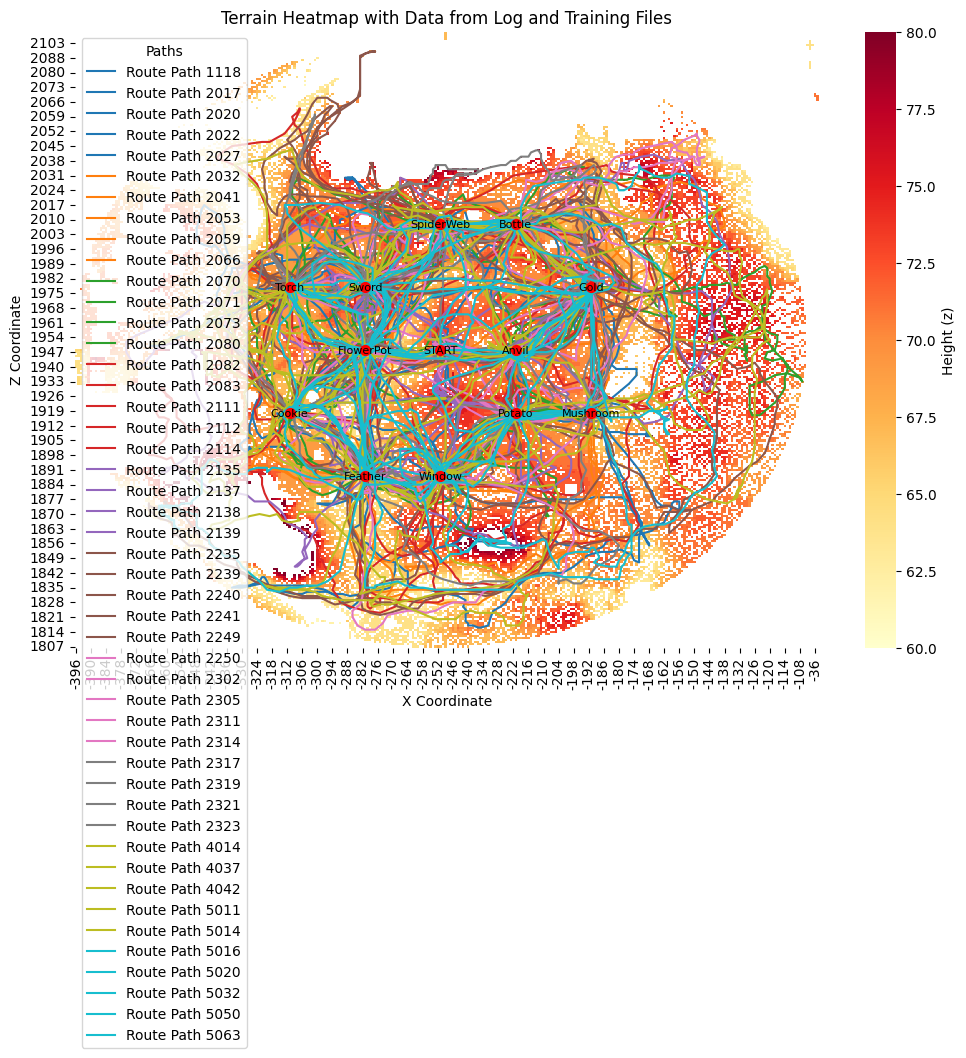

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# 加载数据
terrain_data = pd.read_csv('d:/projects/Gaming/data/4E/terrain/df_min_y_filtered.csv')

# 准备热力图数据
heatmap_data = terrain_data.pivot(index='z', columns='x', values='y')

# 绘制热力图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, cmap="YlOrRd", cbar_kws={'label': 'Height (z)'})
plt.title("Terrain Heatmap with Data from Log and Training Files")
plt.xlabel("X Coordinate")
plt.ylabel("Z Coordinate")
plt.gca().invert_yaxis()  # Invert y-axis for traditional map view

# 使用不同颜色绘制每条路径
colors = cm.get_cmap('tab10', len(dataframes2))  # 使用 'tab10' 调色板
for i, (path_id, df) in enumerate(dataframes1.items()):
    x_path = df[0]  # 假设 x 坐标在第 0 列
    y_path = df[2]  # 假设 y 坐标在第 2 列
    
    # 转换路径点为与 heatmap_data 匹配的坐标
    x_path_transformed = [heatmap_data.columns.get_loc(x) + 0.5 for x in x_path if x in heatmap_data.columns]
    y_path_transformed = [heatmap_data.index.get_loc(y) + 0.5 for y in y_path if y in heatmap_data.index]
    
    # 绘制路径，使用不同的颜色
    ax.plot(x_path_transformed, y_path_transformed, linestyle='-', color=colors(i), label=f'Route Path {path_id}')

# 绘制 unique_locations 中的标注点，确保在路径图层之上
for (x, y, z), label in unique_locations.items():
    if x in heatmap_data.columns and z in heatmap_data.index:
        x_transformed = heatmap_data.columns.get_loc(x) + 0.5  # 中心化
        y_transformed = heatmap_data.index.get_loc(z) + 0.5    # 中心化
        
        # 绘制标记点和标签
        ax.scatter(x_transformed, y_transformed, color='red', s=50, marker='o', zorder=5)
        ax.text(x_transformed, y_transformed, label, color='black', ha='center', va='center', fontsize=8, zorder=5)

plt.legend(title='Paths')
plt.show()